In [1]:
import pandas as pd

In [2]:
fname = 'Totals.csv'
f = open(fname, encoding = 'cp950')
data = f.read()
f.close()

In [3]:
data

'Date,Views\n2021-04-22,0\n2021-04-23,0\n2021-04-24,491\n2021-04-25,117\n2021-04-26,54\n2021-04-27,794\n2021-04-28,738\n2021-04-29,1695\n2021-04-30,925\n2021-05-01,220\n2021-05-02,176\n2021-05-03,85\n2021-05-04,39\n2021-05-05,100\n2021-05-06,45\n2021-05-07,40\n2021-05-08,38\n2021-05-09,35\n2021-05-10,12\n2021-05-11,17\n2021-05-12,18\n2021-05-13,14\n2021-05-14,29\n2021-05-15,17\n2021-05-16,175\n2021-05-17,108\n2021-05-18,56\n2021-05-19,32\n2021-05-20,50\n2021-05-21,36\n2021-05-22,45\n2021-05-23,54\n2021-05-24,35\n2021-05-25,28\n2021-05-26,254\n2021-05-27,68\n2021-05-28,67\n2021-05-29,425\n2021-05-30,158\n2021-05-31,112\n2021-06-01,55\n2021-06-02,61\n2021-06-03,53\n2021-06-04,18\n2021-06-05,37\n2021-06-06,42\n2021-06-07,50\n2021-06-08,39\n2021-06-09,30\n2021-06-10,21\n2021-06-11,13\n2021-06-12,50\n2021-06-13,40\n2021-06-14,27\n2021-06-15,63\n2021-06-16,55\n2021-06-17,35\n2021-06-18,20\n2021-06-19,28\n2021-06-20,55\n2021-06-21,55\n2021-06-22,22\n2021-06-23,21\n2021-06-24,36\n2021-06-25,23

In [4]:
lines=data.split('\n')

In [5]:
len(lines)

141

In [6]:
headers=lines[0].split(',')[1]

headers

'Views'

In [7]:
del lines[0]

In [8]:
len(lines)

140

In [9]:
del lines[139]

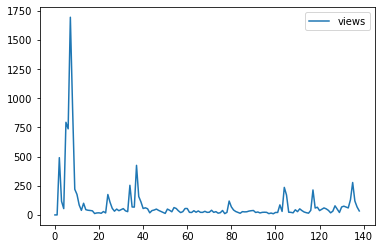

In [10]:
import numpy as np 
from matplotlib import pyplot as plt


views = []
# enumerate will give the count number of the loop (i)
for i, line in enumerate(lines):
#     print(line.split(','))
#     print(i, line)

    view = int(line.split(',')[1]) # get the information of youtube view
    views.append(view) # for RNN format 

views = np.array(views) # convert it into  numpy array 

plt.plot(views, label="views")
plt.legend()
plt.show()


In [11]:
print(len(views))

139


## Let's use RNN to predict viewers in next 1 days.

In [12]:
print(len(views))

139


In [13]:
new_raw_data=[]
for i in range(len(views)):
    new_raw_data.append([views[i]])
print(type(new_raw_data))
new_raw_data = np.array(new_raw_data)
print(type(new_raw_data))

<class 'list'>
<class 'numpy.ndarray'>


## I plan to use last 3 days to predict the next day views

In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 3
delay = 3 
sampling_rate = 1
stride = 1 
batch_size = 1 

data = new_raw_data[:-(delay)]
target = new_raw_data[(delay):] 
print(len(data), len(target))
# Create Training Data 
train_gen = TimeseriesGenerator(data, target, 
                               length=length,
                               sampling_rate=sampling_rate,
                               stride=stride,
                               start_index=0,
                               end_index=100,
                               batch_size=1)
# Create Validation Data 
val_gen = TimeseriesGenerator(data, target, 
                               length=length,
                               sampling_rate=sampling_rate,
                               stride=stride,
                               start_index=101,
                               end_index=135,
                               batch_size=1)
# # Create Testing Data 
# test_gen = TimeseriesGenerator(data, target, 
#                                length=length,
#                                sampling_rate=sampling_rate,
#                                stride=stride,
#                                start_index=21,
#                                end_index=24,
#                                batch_size=1)

136 136


In [15]:
print(train_gen)
print(len(train_gen))

98


In [16]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
rnn_model = Sequential([
    layers.SimpleRNN(10, input_shape=(3, 1)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)  
])
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [17]:
rnn_model.compile(optimizer='rmsprop', loss='mse',
                   metrics=['mae']) 

In [18]:
rnn_history = rnn_model.fit(train_gen,
                               epochs=1000,
                               validation_data=val_gen)


Epoch 1/1000
98/98 [==============================] - 1s 3ms/step - loss: 48898.6133 - mae: 80.5104 - val_loss: 6547.4736 - val_mae: 59.3464
Epoch 2/1000
98/98 [==============================] - 0s 2ms/step - loss: 48671.2617 - mae: 79.2157 - val_loss: 6374.9536 - val_mae: 57.8720
Epoch 3/1000
98/98 [==============================] - 0s 2ms/step - loss: 48530.9727 - mae: 77.8854 - val_loss: 6219.9087 - val_mae: 56.5194
Epoch 4/1000
98/98 [==============================] - 0s 2ms/step - loss: 48271.4727 - mae: 76.3508 - val_loss: 6062.1719 - val_mae: 55.1073
Epoch 5/1000
98/98 [==============================] - 0s 2ms/step - loss: 47974.2539 - mae: 74.6173 - val_loss: 5844.0278 - val_mae: 53.0912
Epoch 6/1000
98/98 [==============================] - 0s 1ms/step - loss: 47783.8555 - mae: 72.9731 - val_loss: 5692.5894 - val_mae: 51.6453
Epoch 7/1000
98/98 [==============================] - 0s 2ms/step - loss: 47482.6328 - mae: 71.2304 - val_loss: 5496.0884 - val_mae: 49.7064
Epoch 8/1000


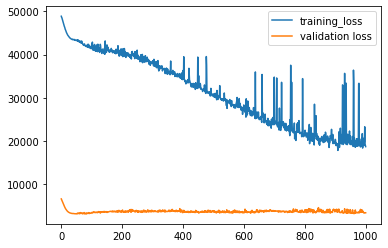

In [19]:
plt.plot(rnn_history .history['loss'], label='training_loss')
plt.plot(rnn_history .history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [20]:
rnn_model.evaluate(val_gen)

32/32 [==============================] - 0s 2ms/step - loss: 3334.7185 - mae: 32.2015


[3334.718505859375, 32.20146179199219]

## We have to try to generate Stateful RNN Module Data


In [21]:
def statefulGenerator(data, target,
                      length=1,
                      sampling_rate=1,
                      stride=1,
                      start_index=0,
                      end_index=None, 
                      batch_size=128):
        if end_index==None: end_index=len(data)-1
            
        data_len = ((end_index-start_index+1)-length)//stride 
        tmp_batch_size = data_len//batch_size  # we can modify it from setting(32) to 1 when prediction

        end_index = tmp_batch_size*batch_size*stride + (length-1) + start_index  
        data_gen = TimeseriesGenerator(data, target, 
                               length=length,
                               sampling_rate=sampling_rate,
                               stride=stride,
                               start_index=start_index,
                               end_index=end_index,
                               batch_size=tmp_batch_size)
  
        new_data = []
        new_target = []

        for i in data_gen:
            new_data.append(i[0])
            new_target.append(i[1])
  
        new_data = np.array(new_data)
        new_target = np.array(new_target)

        new_data = new_data.transpose(1, 0, 2, 3)
        new_target = new_target.transpose(1, 0, 2)

        new_data_gen = []
        for i in range(len(new_data)):
            new_data_gen.append((new_data[i], new_target[i]))
    
        return new_data_gen

In [22]:
# Create Training Data 
state_train_gen = statefulGenerator(data, target, 
                               length=length,
                               sampling_rate=sampling_rate,
                               stride=stride,
                               start_index=0,
                               end_index=100,
                               batch_size=1)
# Create Validation Data 
state_val_gen = statefulGenerator(data, target, 
                               length=length,
                               sampling_rate=sampling_rate,
                               stride=stride,
                               start_index=101,
                               end_index=135,
                               batch_size=1)
# # Create Testing Data 
# state_test_gen = statefulGenerator(data, target, 
#                                length=length,
#                                sampling_rate=sampling_rate,
#                                stride=stride,
#                                start_index=130001,
#                                end_index=None,
#                                batch_size=batch_size)


In [23]:
state_model = Sequential([
              layers.SimpleRNN(10, stateful=True, batch_input_shape=(1, 3, 1)),
              layers.Dense(10, activation='relu'),
              layers.Dense(1)
])
state_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (1, 10)                   120       
_________________________________________________________________
dense_2 (Dense)              (1, 10)                   110       
_________________________________________________________________
dense_3 (Dense)              (1, 1)                    11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.python.keras.utils.data_utils import iter_sequence_infinite as iter_inf 
state_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

epochs = 1000
loss = []
val_loss = []
for i in range(epochs):
    print('Epoch', i+1, '/', epochs)
    state_history = state_model.fit_generator(iter_inf(state_train_gen),
                                  steps_per_epoch=len(state_train_gen),
                                  validation_data=iter_inf(state_val_gen),
                                  validation_steps=len(state_val_gen),
                                  epochs=1,
                                  verbose=1,
                                  shuffle=False) # Because the time series
    loss.append(state_history.history['loss'])
    val_loss.append(state_history.history['val_loss'])
    state_model.reset_states()


Epoch 1 / 1000


C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


98/98 [==============================] - 2s 4ms/step - loss: 49090.9023 - mae: 81.2411 - val_loss: 6629.0840 - val_mae: 60.0311
Epoch 2 / 1000
98/98 [==============================] - 0s 2ms/step - loss: 48890.3984 - mae: 80.0772 - val_loss: 6498.6050 - val_mae: 58.9343
Epoch 3 / 1000
98/98 [==============================] - 0s 2ms/step - loss: 48709.8164 - mae: 78.9069 - val_loss: 6352.9014 - val_mae: 57.6849
Epoch 4 / 1000
98/98 [==============================] - 0s 1ms/step - loss: 48508.5391 - mae: 77.5887 - val_loss: 6194.8853 - val_mae: 56.2985
Epoch 5 / 1000
98/98 [==============================] - 0s 1ms/step - loss: 48290.2617 - mae: 76.1399 - val_loss: 6027.7119 - val_mae: 54.7937
Epoch 6 / 1000
98/98 [==============================] - 0s 1ms/step - loss: 48058.8945 - mae: 74.5795 - val_loss: 5854.6216 - val_mae: 53.1908
Epoch 7 / 1000
98/98 [==============================] - 0s 1ms/step - loss: 47818.4336 - mae: 72.9283 - val_loss: 5678.8643 - val_mae: 51.5122
Epoch 8 / 1000

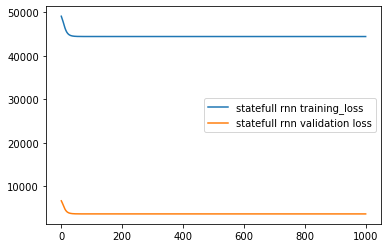

In [25]:
plt.plot(loss, label='statefull rnn training_loss')
plt.plot(val_loss, label='statefull rnn validation loss')
plt.legend()
plt.show()

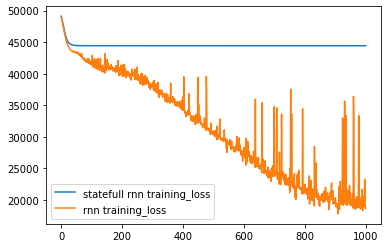

In [26]:
plt.plot(loss, label='statefull rnn training_loss')
plt.plot(rnn_history .history['loss'], label='rnn training_loss')
plt.legend()
plt.show()